# CSCN8010 Lab7 Practice
For the MNIST dataset, you can perform various exploratory analyses, such as visualizing the distribution of labels, exploring the pixel intensity distributions, and examining the class balance.
This Exploration Data Analysis; EDA provides insights into the structure and distribution of the MNIST dataset, which is essential for further analysis and modeling.

Firstly, import the necessary libraries including NumPy, Pandas, Matplotlib, Seaborn, and scikit-learn. We then load the MNIST dataset using fetch_openml() function and extract the features (X) and target variable (y).

We display basic information about the dataset such as the shape of the feature matrix and the target vector. We visualize the class distribution using a count plot and display random samples from the dataset using subplots.

Lastly, we compute the average pixel intensity for each digit and visualize the results using a bar plot.



In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [11]:
from sklearn.datasets import fetch_openml

# Download the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Separate the features (X) and the labels (y)
X, y = mnist["data"], mnist["target"]

# Convert the labels from strings to integers
y = y.astype(int)

c:\Users\DELL\Desktop\Class\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of the feature matrix: (70000, 784)
Shape of the target vector: (70000,)


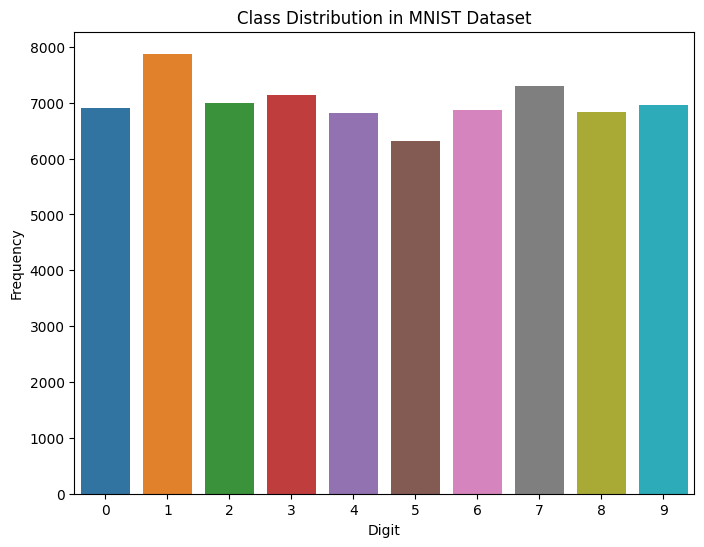

c:\Users\DELL\Desktop\Class\venv\CSCN8010_classic_ml\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


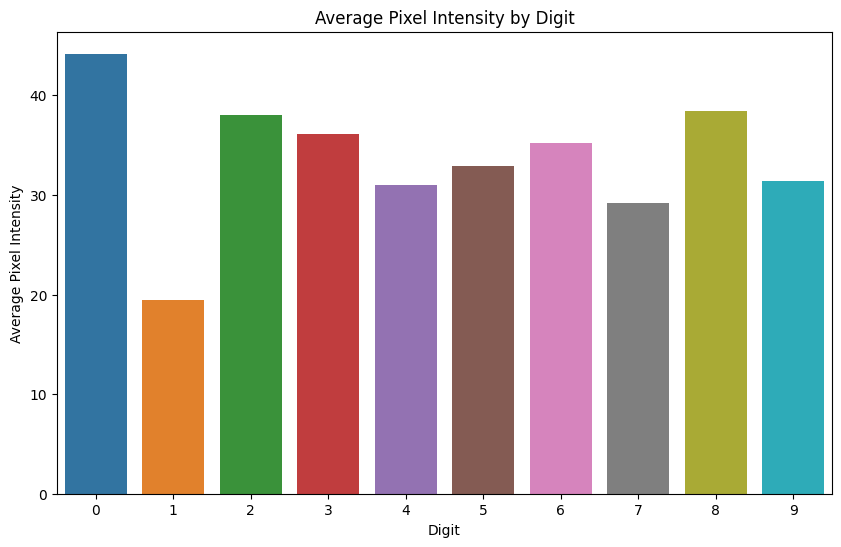

In [8]:
# Extract features and target variable
X, y = mnist["data"], mnist["target"]

# Convert target variable to integers
y = y.astype(np.uint8)

# Display basic information about the dataset
print("Shape of the feature matrix:", X.shape)
print("Shape of the target vector:", y.shape)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution in MNIST Dataset")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()


# Compute and visualize average pixel intensity for each digit
pixel_means = X.mean(axis=1)
digit_means = {digit: pixel_means[y == digit].mean() for digit in range(10)}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(digit_means.keys()), y=list(digit_means.values()))
plt.title("Average Pixel Intensity by Digit")
plt.xlabel("Digit")
plt.ylabel("Average Pixel Intensity")
plt.show()

In [40]:
print("Length of X:", len(X))
print("Length of y:", len(y))

Length of X: 70000
Length of y: 70000


In [41]:
print(X[:10])  # Print first 10 samples from X
print(y[:10])  # Print corresponding labels from y

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0

# Classes

In [33]:
# Split the dataset into features (X) and target labels (y)
X, y = mnist['data'], mnist['target']

# Convert string labels to integers
y = y.astype(int)

# Define the subset of classes (digits) to keep
# For example, let's keep only digits 0, 1, and 2
subset_classes = [3, 4, 9]

# Filter the dataset to keep only the selected classes
X_subset = X[y.isin(subset_classes)]
y_subset = y[y.isin(subset_classes)]

# Split the subset dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Verify the number of samples in the subset dataset
print("Number of samples in the subset dataset:", X_subset.shape[0])

# Verify the classes in the subset dataset
print("Classes in the subset dataset:", set(y_subset))


Number of samples in the subset dataset: 20923
Classes in the subset dataset: {9, 3, 4}


## Spliting  the dataset to train-validation-test 

In [34]:
# Split the subset dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (12553, 784) (12553,)
Validation set shape: (4185, 784) (4185,)
Test set shape: (4185, 784) (4185,)


**Source**: [MNIST-SVM Website](https://www.kaggle.com/code/adnanzaidi/mnist-svm)

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


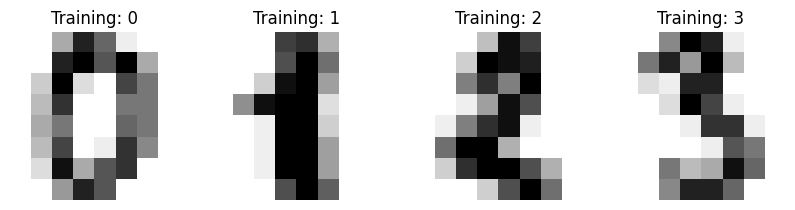

In [12]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [13]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

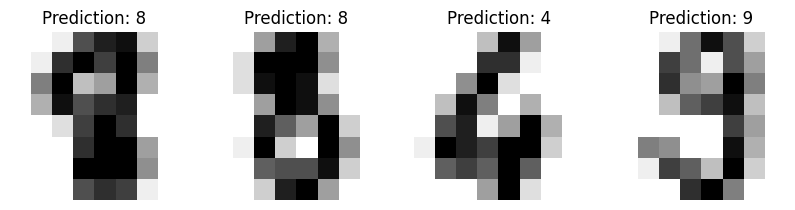

In [14]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# Run an evaluation on the validation dataset

In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train your model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
for i in range(len(precision)):
    print(f"Class {i}: Precision = {precision[i]}, Recall = {recall[i]}, F1 Score = {f1[i]}")


c:\Users\DELL\Desktop\Class\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9178571428571428
Confusion Matrix:
 [[1289    1    6    0    5   14   12    6    8    2]
 [   0 1557    5    9    2    7    0    3   15    2]
 [   4   20 1229   25   16    8   19   15   35    9]
 [   6    7   30 1298    1   38    4   14   19   16]
 [   4    0    8    5 1194    4   13    6   12   49]
 [   7   11    8   53   16 1087   20    2   54   15]
 [   7    3   20    0   14   14 1332    2    4    0]
 [   5    4   28    4    8    5    0 1408    2   39]
 [  11   24   17   38    7   39   12   10 1186   13]
 [   7   10    7   14   40    5    0   45   22 1270]]
Class 0: Precision = 0.9619402985074627, Recall = 0.9597915115413254, F1 Score = 0.9608647036898994
Class 1: Precision = 0.9511301160659743, Recall = 0.973125, F1 Score = 0.9620018535681187
Class 2: Precision = 0.9050073637702504, Recall = 0.8905797101449275, F1 Score = 0.8977355734112492
Class 3: Precision = 0.8976486860304288, Recall = 0.9057920446615492, F1 Score = 0.901701979854116
Class 4: Precision = 0.916346891

### precision-recall curve for one class of your choice vs. all others (see code in Performance Metrics for Classification. There are two types of precision-recall plots there. Choose either (or both)

In [21]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



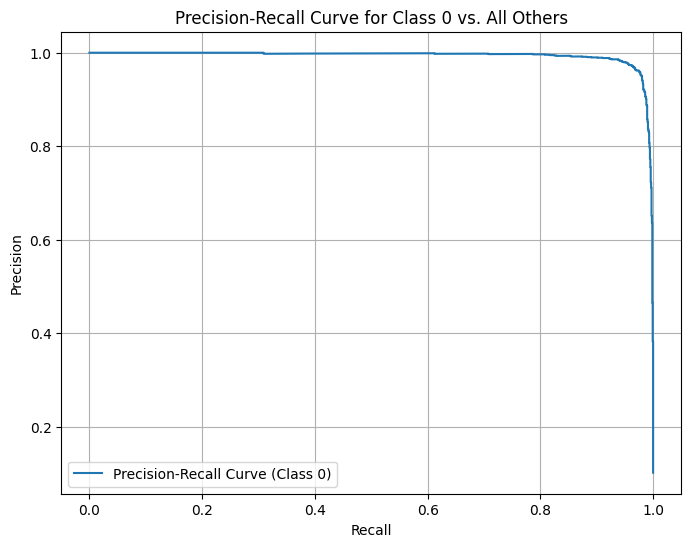

In [20]:
# Plot the precision-recall curve class
class_index = 0  # For example, choosing class 0

# Predict probabilities for each class
y_probs = model.predict_proba(X_val)

# Calculate precision and recall for the chosen class
precision, recall, thresholds = precision_recall_curve(y_val == class_index, y_probs[:, class_index])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (Class {})'.format(class_index))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class {} vs. All Others'.format(class_index))
plt.legend()
plt.grid(True)
plt.show()


# Insights
By carefully evaluating the model's performance metrics and precision-recall curves on the validation dataset, you can gain insights into its strengths and weaknesses and make informed decisions to improve its performance.
From the graph, you can see that the precision is high with high decision threshold

# Adjusting Decision Threshold & Evaluating ***Precision*** and ***Recall***

### For Precision

In [23]:
# Calculate precision for each class separately with average = None
precision_per_class = precision_score(y_val, binary_predictions, average=None)

print("Precision for each class with adjusted threshold:", precision_per_class)

Precision for each class with adjusted threshold: [0.11460765 0.9815873  0.         0.         0.         0.
 0.         0.         0.         0.        ]


c:\Users\DELL\Desktop\Class\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### For Recall

In [24]:
# Calculate recall for each class separately with average = None
recall_per_class = recall_score(y_val, binary_predictions, average=None)

print("Recall for each class with adjusted threshold:", recall_per_class)

Recall for each class with adjusted threshold: [1.         0.96564647 0.         0.         0.         0.
 0.         0.         0.         0.        ]


### Further testing of the model

In [25]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on the test set:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(class_report)


Accuracy on the test set: 0.9178571428571428
Confusion Matrix:
[[1289    1    6    0    5   14   12    6    8    2]
 [   0 1557    5    9    2    7    0    3   15    2]
 [   4   20 1229   25   16    8   19   15   35    9]
 [   6    7   30 1298    1   38    4   14   19   16]
 [   4    0    8    5 1194    4   13    6   12   49]
 [   7   11    8   53   16 1087   20    2   54   15]
 [   7    3   20    0   14   14 1332    2    4    0]
 [   5    4   28    4    8    5    0 1408    2   39]
 [  11   24   17   38    7   39   12   10 1186   13]
 [   7   10    7   14   40    5    0   45   22 1270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.91      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.85      0.87      1273
    

# Conclusion
Based on the evaluation results, we can draw conclusions about the effectiveness of the model that further improvements or adjustments made difference in both ***Precision*** and ***Recall*** valus.